# Summary

Models used: Logistic Regression, Support Vector Classifier and Naive Bayes

Scores after pre-processing (TF-IDF Vectorizer):

*   99% Accuracy on Logistic Regression
*   100% Accuracy on Support Vector Classifier
*   94% Accuracy on Naive Bayes Classifier

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import ast
import difflib
import re
import nltk
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

NLTK Stopwords Download

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Importing Datasets

We have two separate datasets, All Fake news and All Real news

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/cse422 dataset/Fake Real News Dataset/Fake.csv')
real = pd.read_csv('/content/drive/MyDrive/cse422 dataset/Fake Real News Dataset/True.csv')

# Datasets Exploration

## Fake News Dataset Exploration

In [ ]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


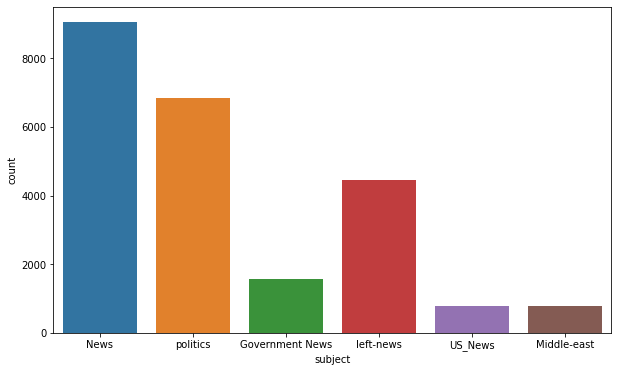

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot('subject', data=fake)

In [ ]:
text = " ".join(fake['text'].tolist())

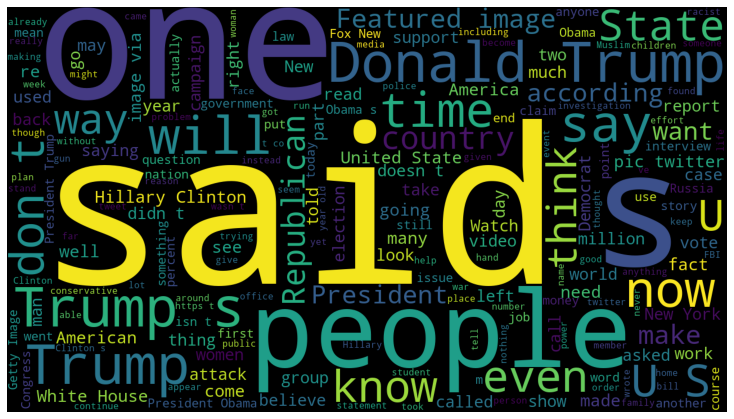

In [ ]:
wordcloud = WordCloud(width=1280, height=720).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Real News Dataset Exploration

In [ ]:
real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


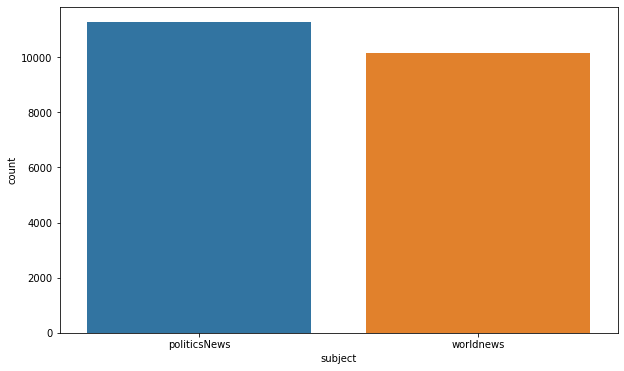

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot('subject', data=real)

In [ ]:
text = " ".join(real['text'].tolist())

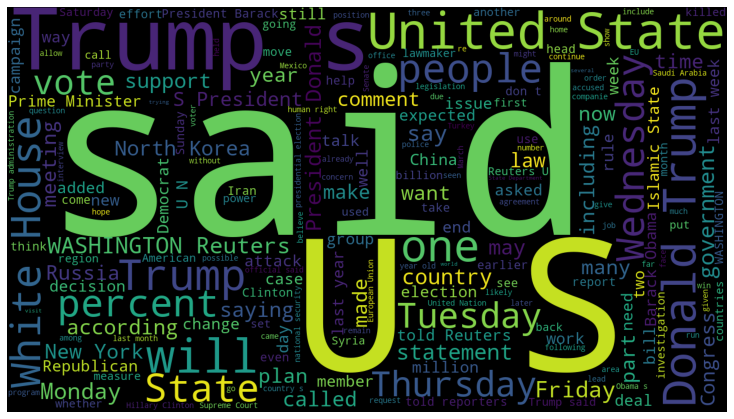

In [ ]:
wordcloud = WordCloud(width=1280, height=720).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Dataset Restructure


## Labeling

Giving Fake News Label = 0 and Real News Label = 1

In [ ]:
fake['label'] = 0
real['label'] = 1

In [ ]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
real.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


## Merging Datasets

In [ ]:
df = pd.concat([fake, real], ignore_index=True, sort=False)

In [ ]:
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


Shuffling the rows

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,title,text,subject,date,label
0,Trump-Supporting GOP Rep Calls Veterans ‘Mooc...,If Republicans and Donald Trump really care ab...,News,"September 23, 2016",0
1,Trump lawyer criticizes Comey's leak to news m...,(Reuters) - Former FBI Director James Comey sa...,politicsNews,"June 9, 2017",1
2,"Focus on search and rescue, restoring power af...",WASHINGTON (Reuters) - Federal officials were ...,worldnews,"September 11, 2017",1
3,DUP says Northern Ireland will leave EU on sam...,BELFAST (Reuters) - The head of the Democratic...,worldnews,"November 20, 2017",1
4,Keith Olbermann to Betsy DeVos: “The Hurricane...,The lefty lunatic of the day just can t keep h...,politics,"Aug 26, 2017",0
...,...,...,...,...,...
44893,FAKE BOMB INCIDENT Wasn’t First Time Muslim Cl...,Even though the Muslim Clock Boy s attention s...,politics,"Sep 29, 2015",0
44894,"After Republicans Gut Zika Funding, Rubio Say...","Republicans claim to be pro-life, but one ne...",News,"August 6, 2016",0
44895,Sessions' role as U.S. attorney general unsett...,"SACRAMENTO, Calif. (Reuters) - The prospect of...",politicsNews,"February 9, 2017",1
44896,GOP Rep Asks Muslim High School Students: ‘Do...,A GOP lawmaker in Oklahoma raised more than a ...,News,"March 4, 2017",0


# Dataset Pre-Processing

## Null Checking

Checking if any data missing

In [ ]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

## Making "Content" Column

Merging all infos of a news in a single text

In [ ]:
df['content'] = df['title'] + " " + df['subject'] + " "  + df['text']

## Dropping unnecessary columns

title, subject, text are merged into content column. So they are no more needed. Also, date column unnecessary.

In [ ]:
df = df.drop(['title', 'subject', 'text', 'date'], axis=1)

In [ ]:
df = df[['content', 'label']]

## Stemming

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. E.g. Actor, Actress, Acting --> Act

In [ ]:
port_stem = PorterStemmer()

*   Removing all non-alphabet characters
*   Converting all letters into lowercase
*   Stemming all Words
*   Removing Stop words

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
df['content'] = df['content'].apply(stemming)

In [ ]:
df

,content,label
0,trump support gop rep call veteran moocher tow...,0
1,trump lawyer critic comey leak news media poli...,1
2,focu search rescu restor power irma u offici w...,1
3,dup say northern ireland leav eu term rest uk ...,1
4,keith olbermann betsi devo hurrican go less da...,0
...,...,...
44893,fake bomb incid first time muslim clock boy tr...,0
44894,republican gut zika fund rubio say infect wome...,0
44895,session role u attorney gener unsettl legal po...,1
44896,gop rep ask muslim high school student beat wi...,0


# Vectorization

Vectorization is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

In [ ]:
vec = TfidfVectorizer()

In [ ]:
X = df['content'].values
Y = df['label'].values

In [ ]:
X = vec.fit_transform(X)

In [ ]:
X

<44898x89870 sparse matrix of type '<class 'numpy.float64'>'
	with 6947929 stored elements in Compressed Sparse Row format>

# Models Training

## Splitting Training and Test Data

We will take 20% Data for Testing and 80% for Training

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle = True)

## Training Models

*   Logistic regression
*   Support Vector Machine (SVM)
*   Naive Bayes Classifiers

In [ ]:
model_LR2 = LogisticRegression(max_iter=20000).fit(X_train,Y_train)
model_SVM2 = SVC(kernel='rbf', random_state = 42).fit(X_train, Y_train)
model_NB2 = ComplementNB().fit(X_train,Y_train)

# Evaluation (Scores on Test Sets)

## LOGISTIC REGRESSION Score

In [ ]:
LR_score = classification_report(Y_test, model_LR2.predict(X_test))
print(LR_score)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4682
           1       0.99      0.99      0.99      4298

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



## SUPPORT VECTOR CLASSIFICATION Scores

In [ ]:
SVC_score = classification_report(Y_test, model_SVM2.predict(X_test))
print(SVC_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4682
           1       1.00      1.00      1.00      4298

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



## NAIVE BAYES CLASSIFICATION Scores

In [ ]:
NB_score = classification_report(Y_test, model_NB2.predict(X_test))
print(NB_score)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4682
           1       0.95      0.93      0.94      4298

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



# Manual Testing

In [ ]:
def output_label(n): 
  if n == 0:
    return "Fake News" 
  elif n == 1:
    return "Real News"

def manual_testing(news):
  testing_news = {"text":[news]} 
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(stemming)
  new_x_test = new_def_test["text"]
  new_xv_test = vec.transform(new_x_test)
  pred_LR = model_LR2.predict(new_xv_test)
  pred_SVM = model_SVM2.predict(new_xv_test)
  pred_NB = model_NB2.predict(new_xv_test)
  return print("\nLR Prediction: {} \nSVM Prediction: {} \nNB Prediction: {}".format(output_label(pred_LR),
                                                                                      output_label(pred_SVM),
                                                                                      output_label(pred_NB)))

## User Input Testing

In [ ]:
newss = str(input())
manual_testing(newss)

On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the fol

In [ ]:
newss = str(input())
manual_testing(newss)

BOSTON (Reuters) - U.S. immigration officials sought to block a federal judgeâ€™s order delaying efforts to deport 51 Indonesians living illegally in New Hampshire, saying they have not shown they would face harm if repatriated, court documents on Wednesday showed. The U.S. governmentâ€™s motion in federal court in Boston was in response to a judgeâ€™s order last month that found members of the group should be given time to make a case that changed conditions in the southeast Asian nation would make it dangerous for them to return. â€œEven if they are removed, petitionersâ€™ generalized evidence of Indonesiaâ€™s conditions do not prove that persecution or torture is immediate or likely for each petitioner,â€ the motion said. It said the court lacked jurisdiction over their claims, and the immigrants did not state any plausible claims.  The group of ethnic Chinese Christians fled the worldâ€™s largest Muslim-majority country following violence that erupted 20 years ago and have been li